# Project Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."


# Dataset Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.


The data set includes information about:

 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
 
- Demographic info about customers – gender, age range, and if they have partners and dependents



# Inspiration

To explore this type of models and learn more about the subject.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, manuipulation and wrangling
pd.set_option("display.max_rows", None, "display.max_columns", None)


import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

import plotly.graph_objs as go # visualization
import plotly.express as px # visualization
import plotly.figure_factory as ff # visualization
import plotly.offline as py # visualization
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# Reading the dataset
data = pd.read_csv('../dataset/churn.csv')

In [3]:
# Get the first five instance of the dataset
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Data Overview

In [4]:
# Function to get quick overview
def dataoverview(df):
    print('Overview of the dataset: \n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nUnique values:\n")
    print(df.nunique())
    print("\nDescriptive statistics overview")
    print(df.describe())

In [5]:
dataoverview(data)

Overview of the dataset: 

Rows: 7043

Number of features: 21

Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values:

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Descriptive statistics overview
       SeniorCi

## Data Preprocessing

## “Garbage in, Garbage out.” — George Fuechsel

Data Preprocessing refers to the steps applied to make data more suitable for data mining(which are just procedures to gain insights from data such as data analytics, machine learning etc.). These are techniques that are used to convert the raw data into a clean data set.


In a real-world data science project, data preprocessing is one of the most important things, and it is one of the common factors of success of a model. It is the longest dtep in the predictive modelling workflow.

Basic data preprocessing steps includes but not limited to:
- Formatting data types
- Handling missing values
- Handling irrelevant/redundant features
- Handling categorical data
- Feature scaling (Normalization)
- splitting the dataset into training and testing datasets

#### Formatting data types

To start, let’s define what data types exist and what measurement scales they have:
1. Numeric
    - Discrete
    - Continous
2. Categorical
    - Ordinal
    - Nominal
    - Binary
3. Date
4. Time series
5. Text
6. Images

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Or this
#data.dtypes

In [8]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Handling missing values

"Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling." — Page 203, Feature Engineering and Selection, 2019.

Missing values can take various forms such as np.nan, null, None, NaN etc. 

We can deal these missing values in two forms:
1. Removing missing values
2. Replacing missing values

The rational behind the respective options is the amount of the missing values. 

```python

if missing values is many:
    drop
else:
    replace
```

- We can drop a row or column with missing values using pandas dropna() function (set a threshold for missing values in order for a row/column to be dropped)
- fillna() function of Pandas conveniently handles missing values. Using fillna(), missing values can be replaced by a special value or an aggreate value such as mean, median. Furthermore, missing values can be replaced with the value before or after it which is pretty useful for time-series datasets.

In [10]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
# Check for missing values
print("Missing values:", data.isnull().sum())

Missing values: customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


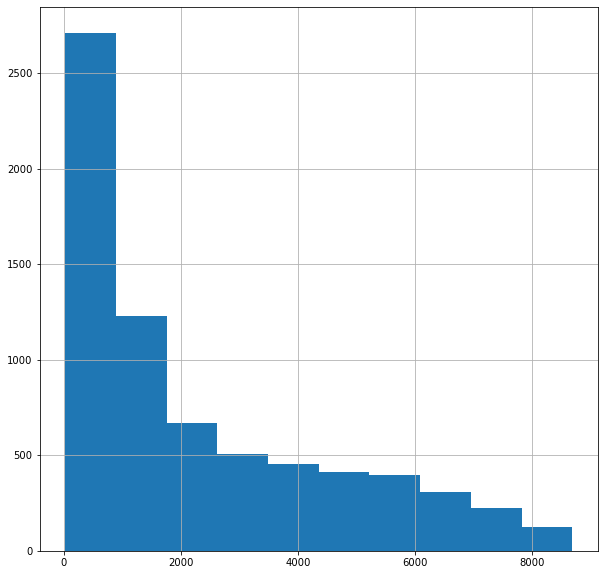

In [12]:
# Checking for the distribution of the feature
data['TotalCharges'].hist(figsize=(10,10));

In [13]:
# Due to the skewness, we will be utilizing the median as the central tendency of the data
median = data['TotalCharges'].median()
data['TotalCharges'].fillna(median, inplace=True)

In [14]:
# Check for missing values
print("Missing values:", data.isnull().sum())

Missing values: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Exploratory Data Analysis (EDA)

In [15]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

#### Let's look at customers who churn within the last month

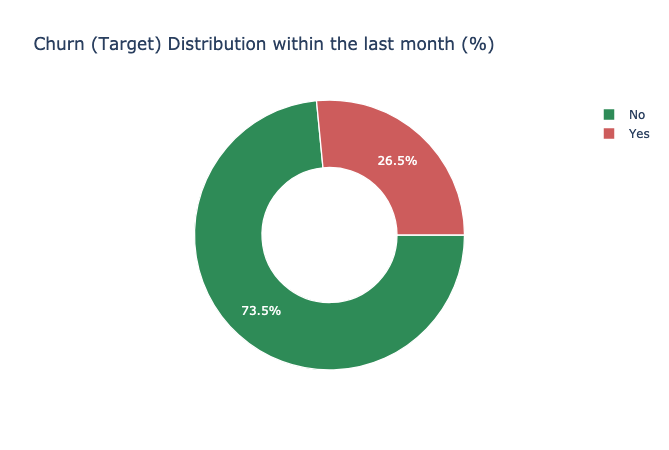

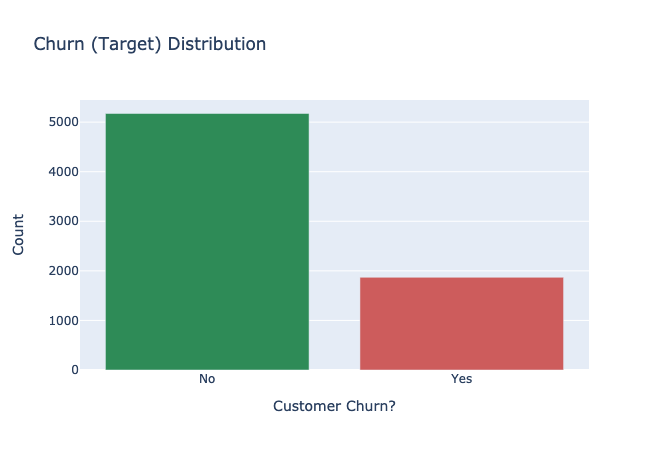

In [16]:
# Distribution in percentages
trace = go.Pie(labels = data["Churn"].value_counts().keys().tolist(),
               values = data["Churn"].value_counts().values.tolist(),
               marker = dict(colors=['seagreen', 'indianred'],
                   line = dict(color = "white", width =  1.3)),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn (Target) Distribution within the last month (%)",
                
                       )
                  )
trace = [trace]
fig = go.Figure(data = trace, layout = layout)
fig.show()


# Distribution in counts
trace = go.Bar(
    x=data.groupby('Churn')['customerID'].count().index,
    y=data.groupby('Churn')['customerID'].count().values,
    marker=dict(
        color=['seagreen', 'indianred']),)

trace = [trace]
layout = go.Layout(
    title='Churn (Target) Distribution', 
    xaxis=dict(
        title='Customer Churn?'),
    yaxis=dict(
        title='Count')
)

fig = go.Figure(data=trace, layout=layout)
fig.show()



In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's consider some numerical columns with relation to the churn. The features to be considered are:
- tenure
- monthly charges
- total charges

Let's look at the probability density distribution, which is use to pecify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value.

We will be utilizing Seaborn Kdeplot (Kernel Distribution Estimation Plot) which depicts the probability density function of the continuous or non-parametric data variables

In [18]:
def kdeplot(feature):
    plt.figure(figsize=(10, 10))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'seagreen', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'indianred', label= 'Churn: Yes')

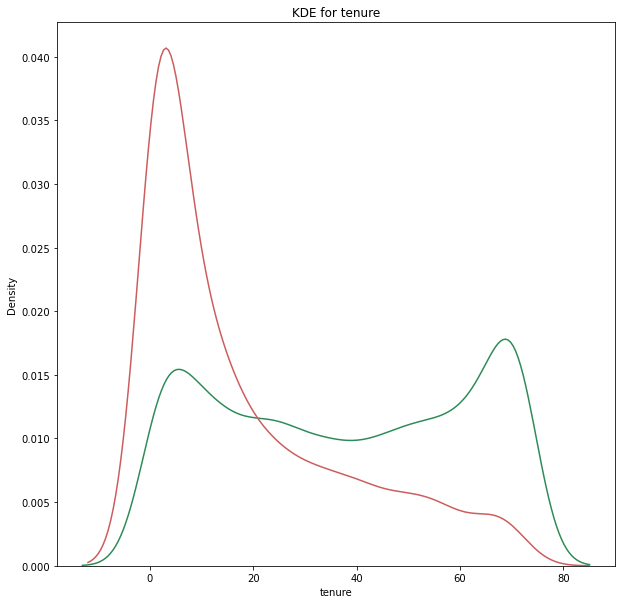

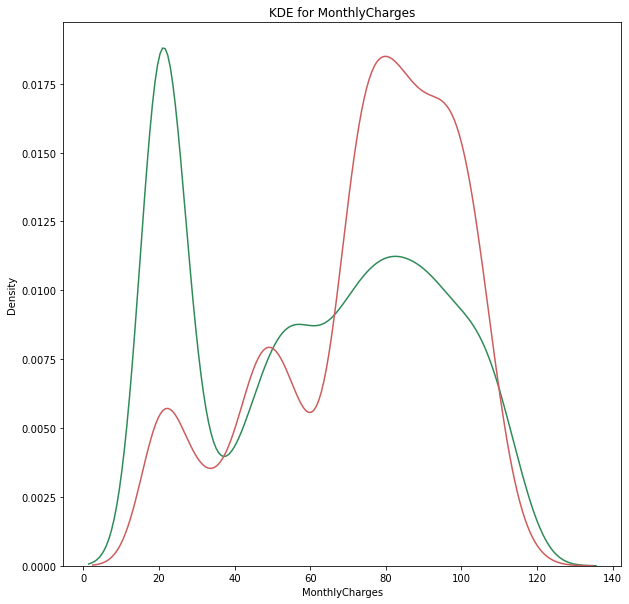

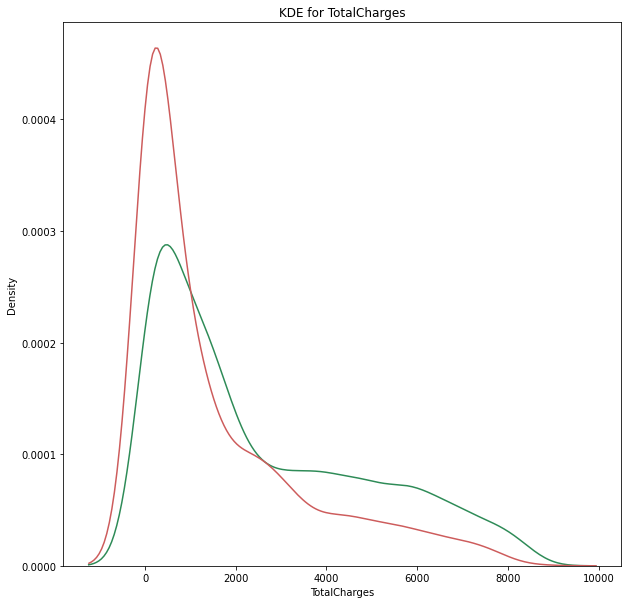

In [19]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:
- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn
- Tenure and MonthlyCharges are probably important features

Let's look at scatterplots of the numeric features

In [20]:
def scatterplot(feature):
    fig = px.scatter(data, x=feature, y="tenure",color="Churn",
                 color_discrete_sequence=['seagreen', 'indianred'])
    fig.show()

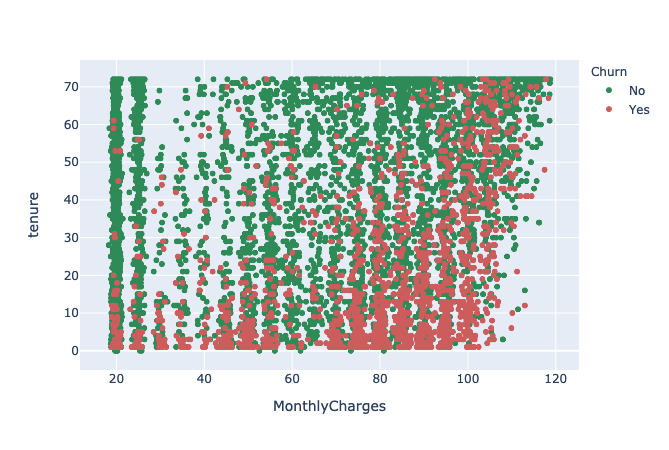

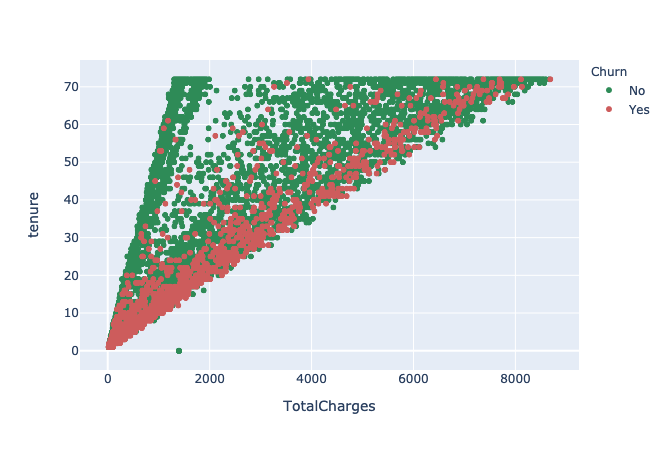

In [21]:
scatterplot('MonthlyCharges')
scatterplot('TotalCharges')

When we look at churner data, total charges tend to increase with tenure and this could have been a factor for churning. When we look at the same for non-churners, there doesn’t seem to be a clear increasing trend.

Let's consider some categorical columns with relation to the churn.

### Demographics:

Let's first understand the
- gender, 
- Senior citizen (Young and Old), 
- partner and 
- dependent status of the customers.

In [22]:
def demographics_analysis(data):
    demographics = ['gender','SeniorCitizen', 'Partner', 'Dependents']
    for demographic in demographics:
        
        if demographic =='SeniorCitizen':
            #Converting the predictor variable in a binary numeric variable
            data[demographic].replace(to_replace=1, value='Yes', inplace=True)
            data[demographic].replace(to_replace=0,  value='No', inplace=True)
           
            
            #Feature distribution
            df1 = data.groupby([demographic]).count()[['customerID']].reset_index()
            df1['percentage'] = (df1['customerID']/df1['customerID'].values.sum())*100
            fig = px.bar(df1, x=demographic, y='percentage', color=demographic)
            fig.update_layout(title=f"{demographic} distribution",barmode='group')
            fig.show()
            
            
            #Feature distribution wrt Churn
            df2 = data.groupby([demographic, 'Churn']).count()['customerID'].unstack()
            
            fig = go.Figure(data=[
                go.Bar(name='Churn-Yes', x=df2.index, y=df2['Yes'], marker_color='indianred' ),
                go.Bar(name='Churn-No', x=df2.index, y=df2['No'], marker_color='seagreen')])
            
            fig.update_layout( title=f"{demographic} distribution wrt Churn",barmode='group')
            
            fig.show()
            
            
        else:
            #Feature distribution
            df1 = data.groupby([demographic]).count()[['customerID']].reset_index()
            df1['percentage'] = (df1['customerID']/df1['customerID'].values.sum())*100
            fig = px.bar(df1, x=demographic, y='percentage', color=demographic)
            fig.update_layout(title=f"{demographic} distribution",barmode='group')
            fig.show()
            
            
            #Feature distribution wrt Churn
            df2 = data.groupby([demographic, 'Churn']).count()['customerID'].unstack()
            
            fig = go.Figure(data=[
                go.Bar(name='Churn-Yes', x=df2.index, y=df2['Yes'], marker_color='indianred'),
                go.Bar(name='Churn-No', x=df2.index, y=df2['No'],marker_color='seagreen')])
            fig.update_layout( title=f"{demographic} distribution wrt Churn",barmode='group')
#             fig.update_traces(marker_color='green')
            fig.show()

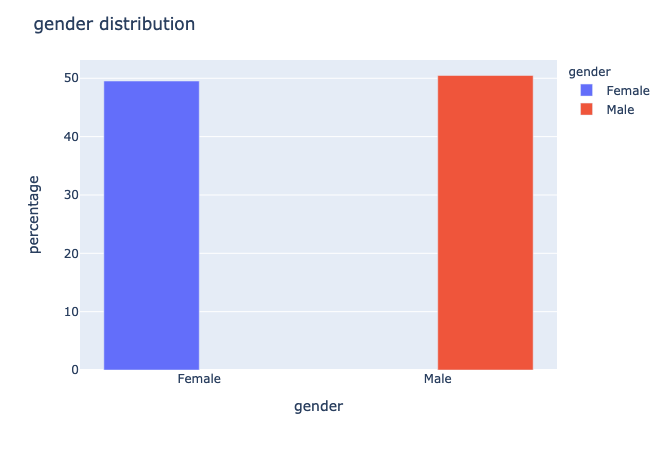

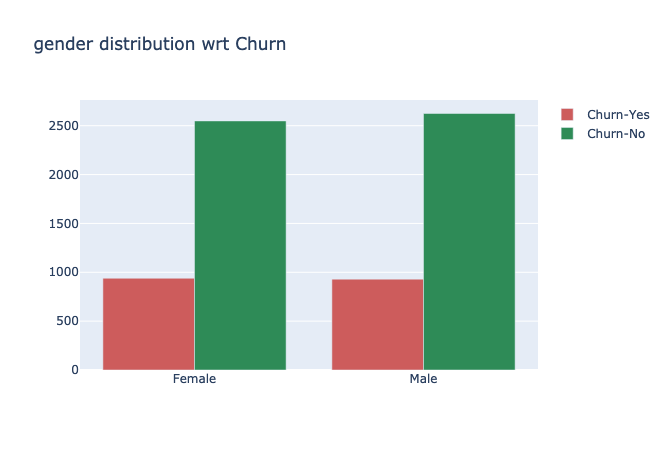

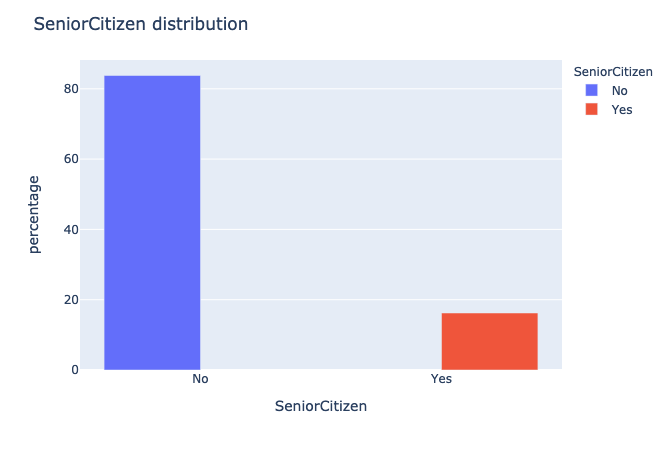

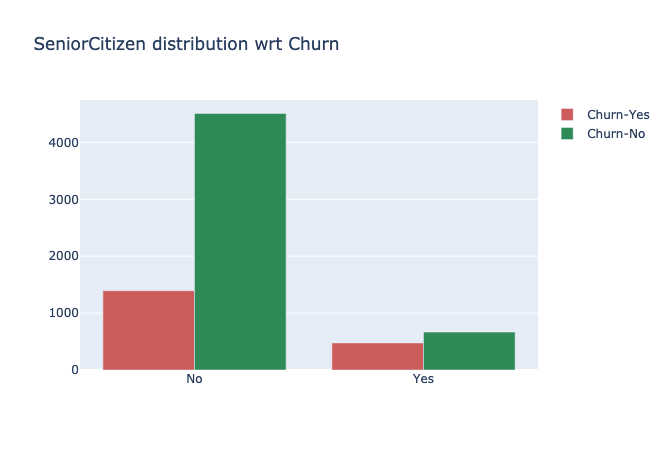

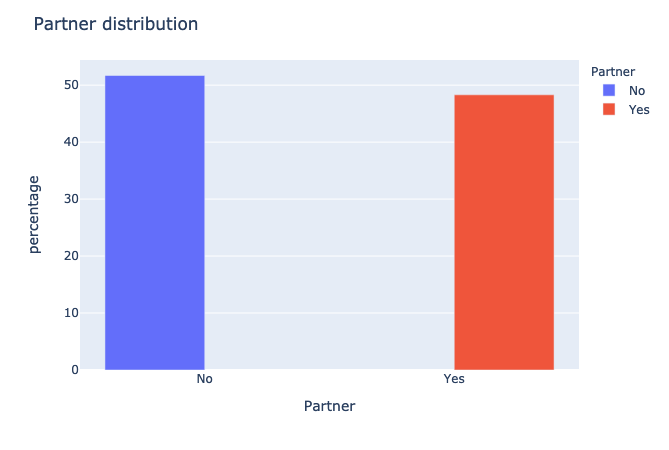

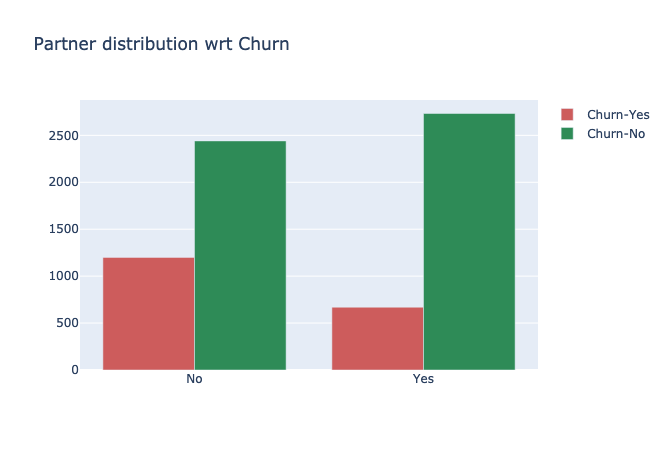

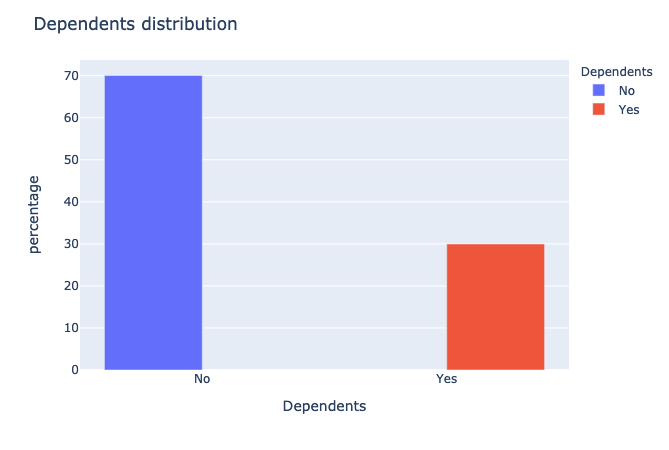

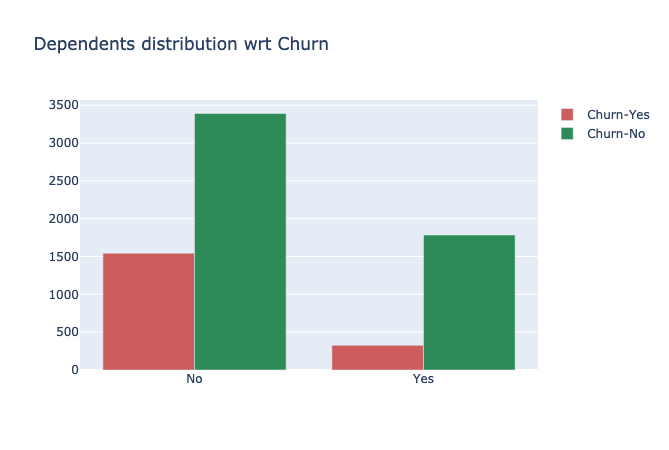

In [23]:
demographics_analysis(data)

- Gender: The dataset contain around 7043 records distributed between females and males. The following diagrame shows the ratios for both in referrence to the "Churn".Its clarify that churn almost equaly distributed between both males and females. Therefor, it's considered has insignificint effect to the target variables.

- Senior citizen: feature considered an important variable to predict the churn. The following plots shows that the senior people who churns are double than who dont.

- Dependents: Based on the above plot, it looks like that people dont churn if they have dependents. Hence, the dependents feature might have a significient contribution in predicting the "Churn".

- Partner: Based on the above plot, it looks like that people dont churn if they have partners. Hence, the partner feature might have a significient contribution in predicting the "Churn".

### Customer Account Information

- Tenure
- Contract Type

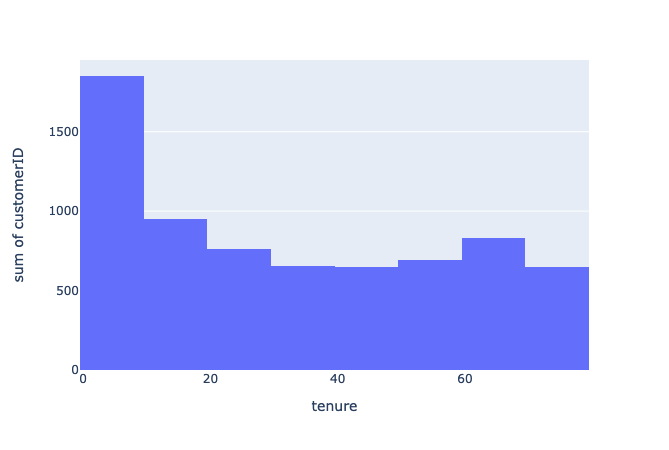

In [24]:
tenure_df = data.groupby(['tenure']).count()[['customerID']].reset_index()
fig = px.histogram(tenure_df, x="tenure", y="customerID")
fig.show()

After looking at the above histogram we can see that a lot of customers have been with the telecom company for 0-9 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

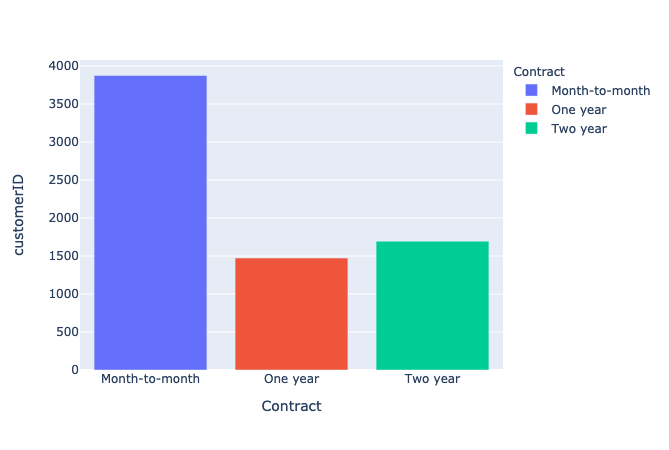

In [25]:
#Contract Type
contract_df = data.groupby(['Contract']).count()[['customerID']].reset_index()
fig = px.bar(contract_df, x="Contract", y='customerID', color="Contract")
fig.show()

It can be seen that month of the customers prefer a monthly subscription plan.

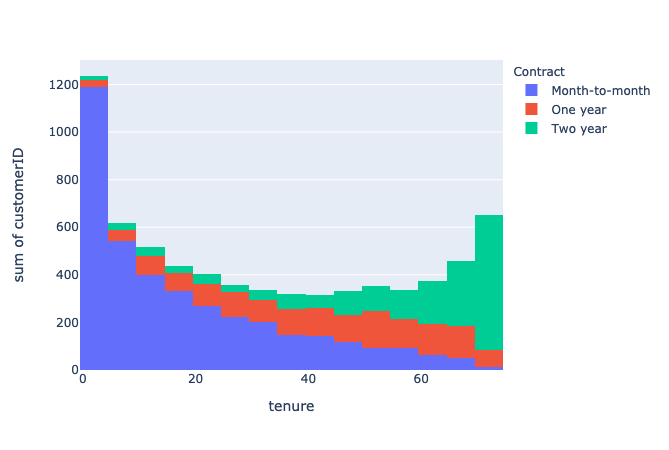

In [26]:
#Contract Type
contract_tenure_df = data.groupby(['Contract', 'tenure']).count()[['customerID']].reset_index()
# #Convertin the predictor variable in a binary numeric variable
fig = px.histogram(contract_tenure_df, x="tenure", y='customerID' ,color='Contract')
fig.show()
# contract_tenure_df.head()

Interestingly most of the monthly contracts last for 1-2 months, while the one year contract tend to last for 50-54 months and lastly the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

In [27]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
def customer_services(data):
    services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
    for service in services:
        #Feature distribution
        df1 = data.groupby([service]).count()[['customerID']].reset_index()
        df1['percentage'] = (df1['customerID']/df1['customerID'].values.sum())*100
        fig = px.bar(df1, x=service, y='percentage', color=service)
        fig.update_layout(title=f"{service} distribution",barmode='group')
        fig.show()

        #Feature distribution wrt Churn
        df2 = data.groupby([service, 'Churn']).count()['customerID'].unstack()

        fig = go.Figure(data=[
            go.Bar(name='Churn-Yes', x=df2.index, y=df2['Yes'], marker_color='indianred' ),
            go.Bar(name='Churn-No', x=df2.index, y=df2['No'], marker_color='seagreen')])

        fig.update_layout( title=f"{service} distribution wrt Churn",barmode='group')

        fig.show()

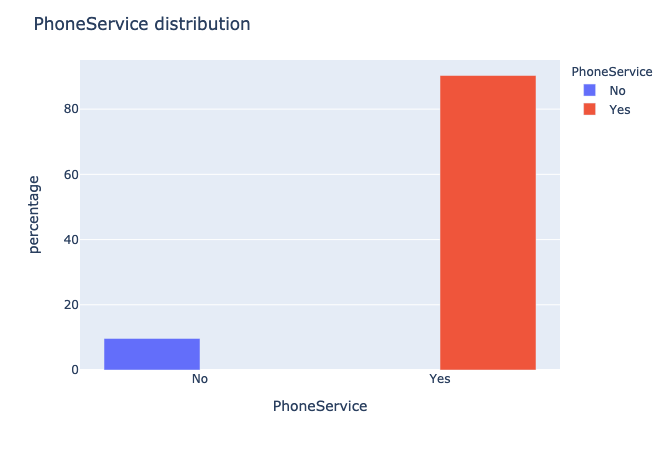

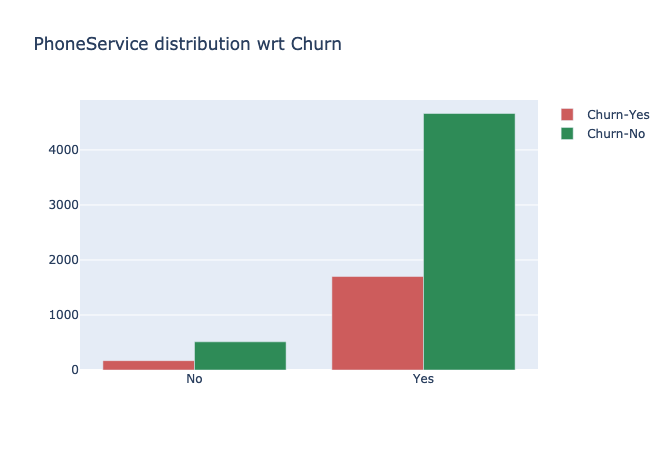

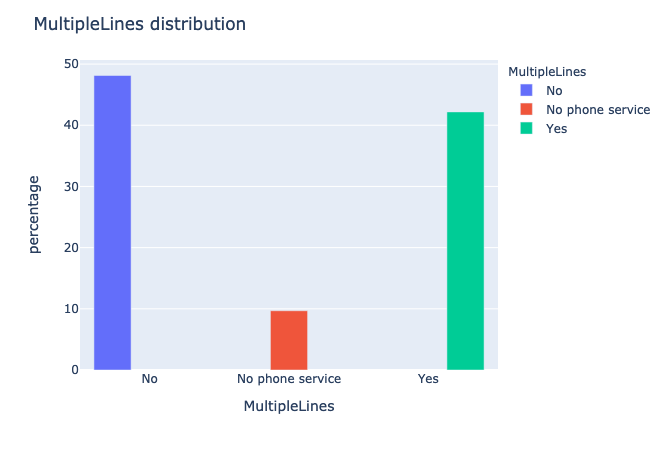

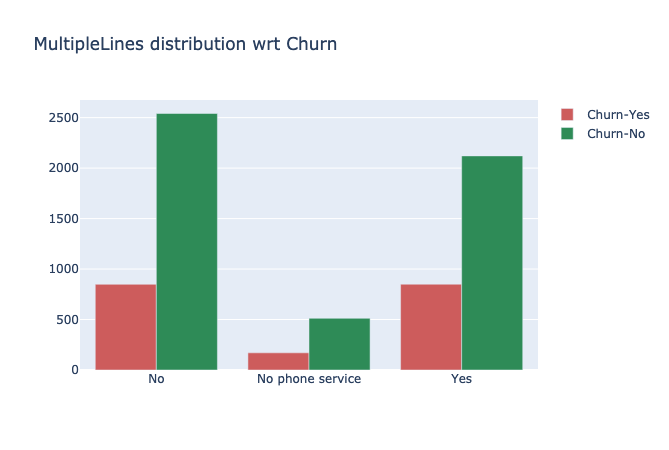

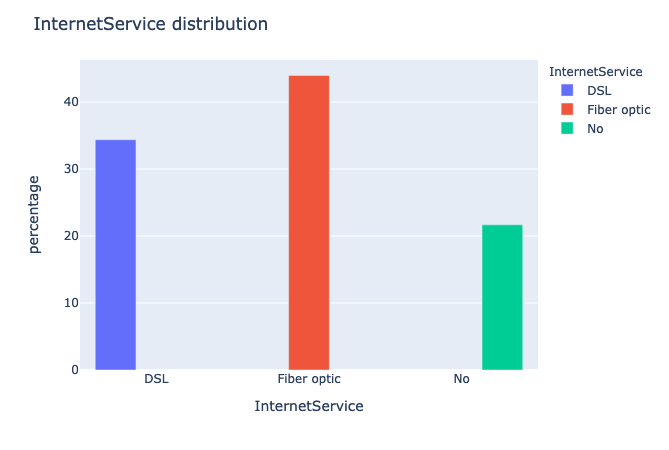

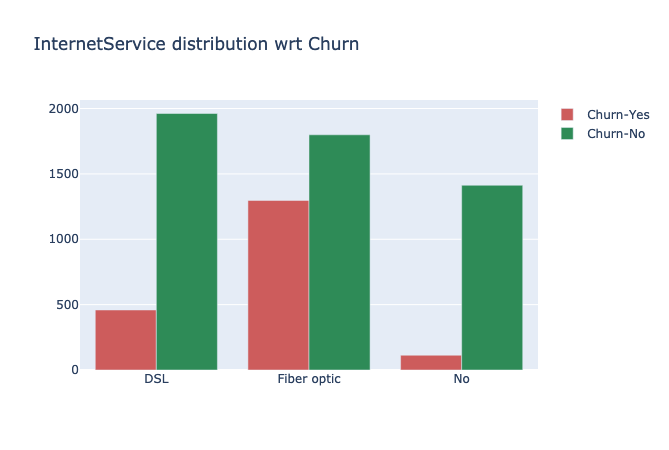

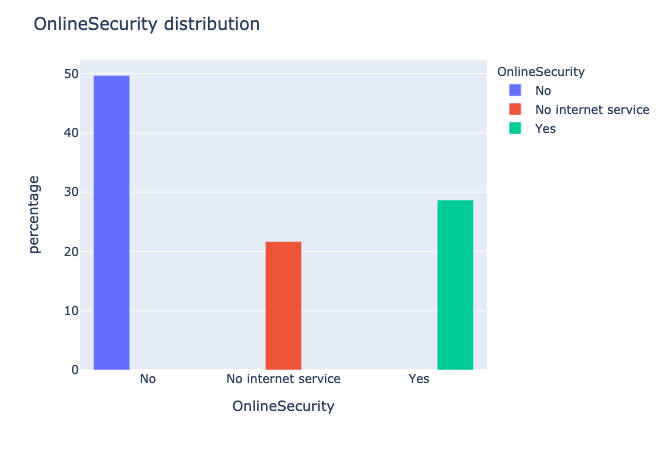

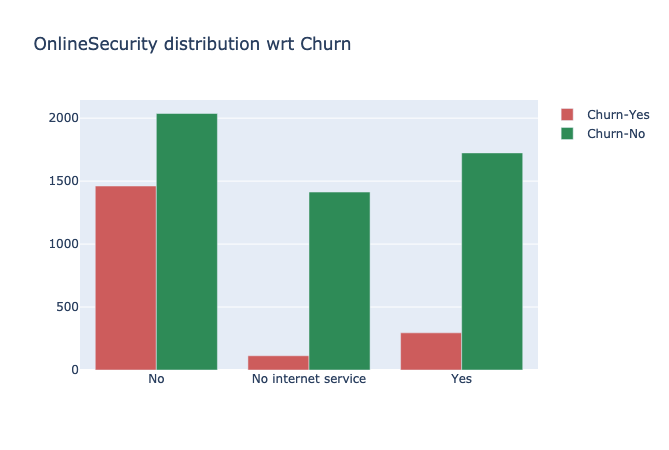

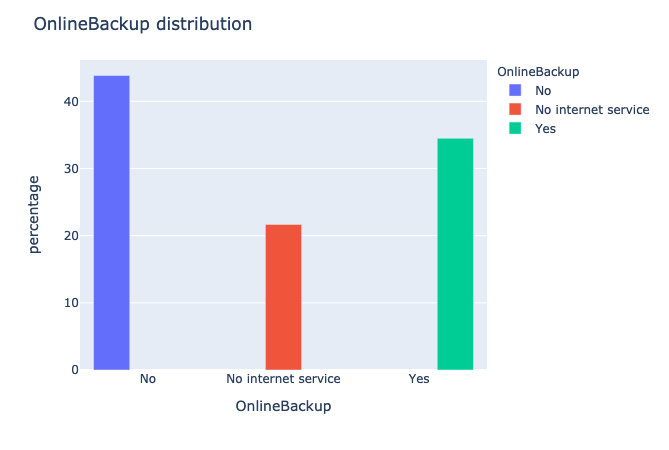

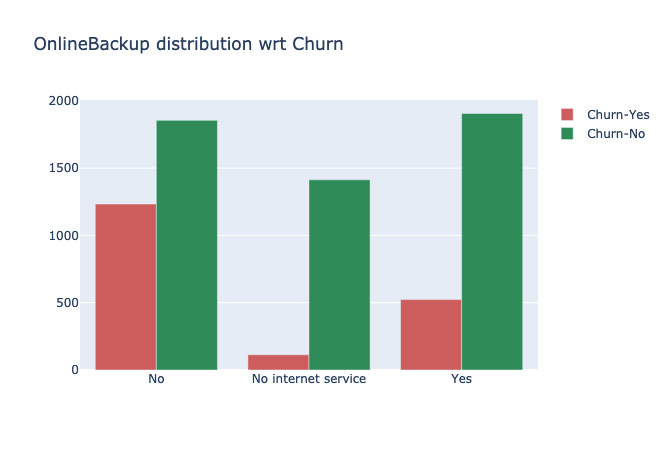

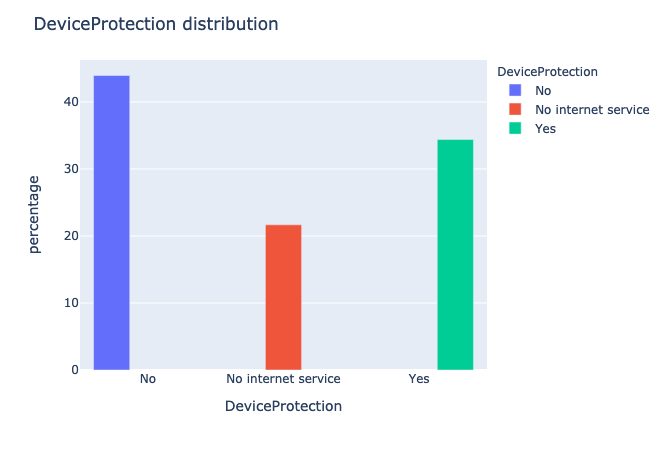

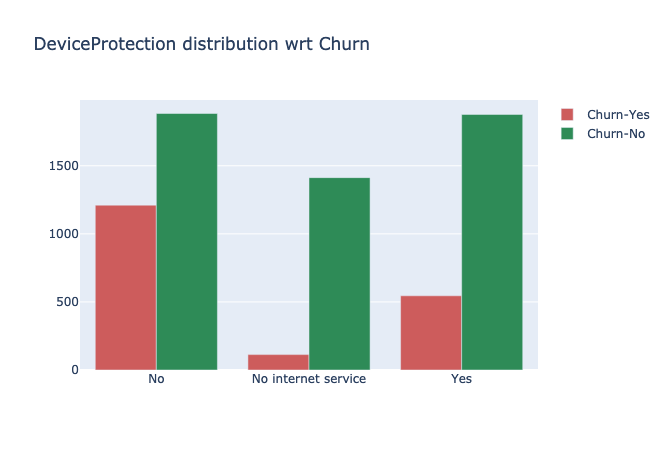

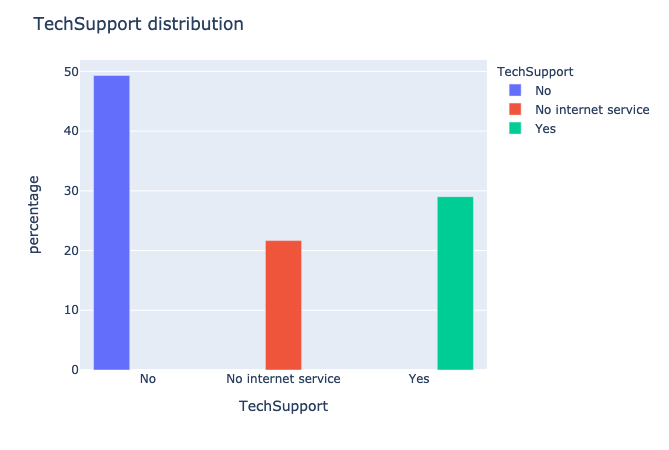

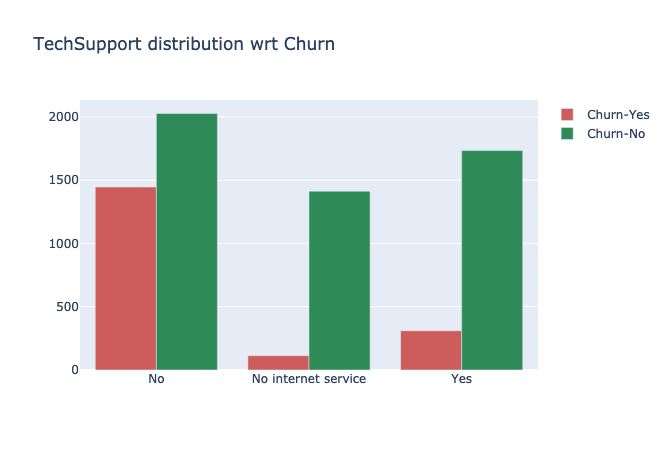

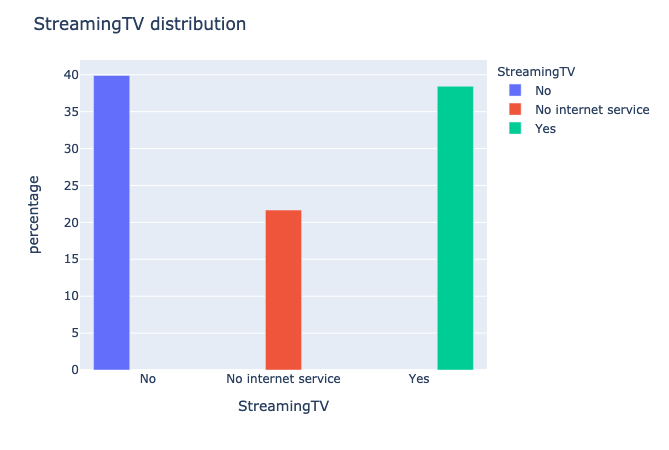

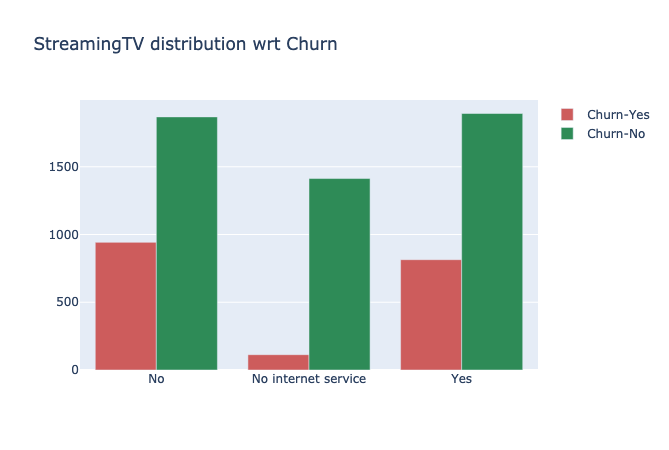

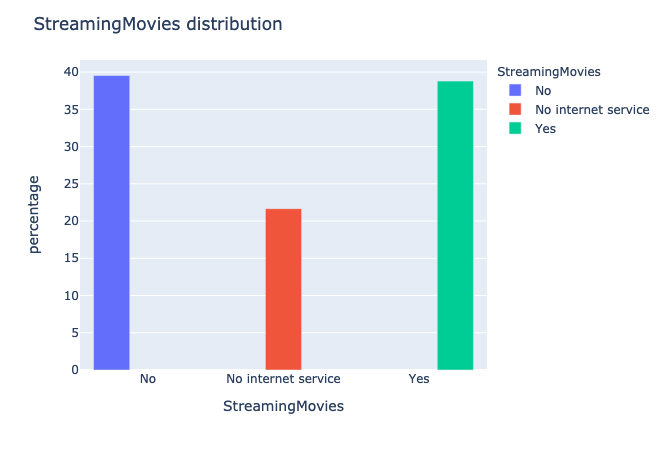

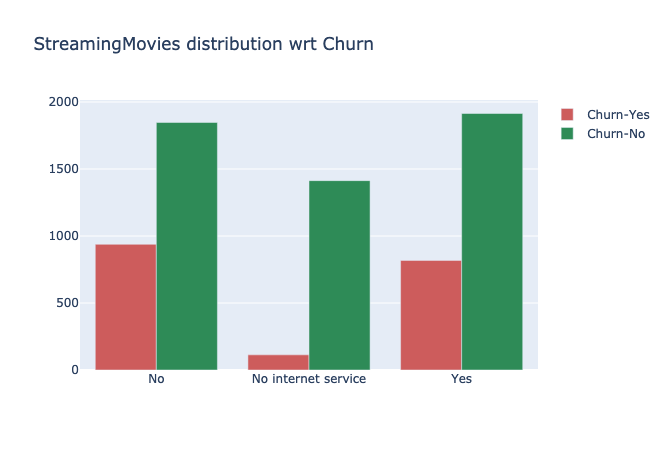

In [29]:
customer_services(data)

We can interpret that the customers with Phone Service, Internet service been supplied by Fibre cables, no Online security and backup, no device protection, no technical support will most probably churn while those who have multiple lines, that stream TV and movies are approxiamately even distributed.

In [30]:
data.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Payments

In [31]:
def payment_services(data):
    payment_services = ['PaymentMethod','PaperlessBilling']
    for service in payment_services:
            #Feature distribution
            df1 = data.groupby([service]).count()[['customerID']].reset_index()
            df1['percentage'] = (df1['customerID']/df1['customerID'].values.sum())*100
            fig = px.bar(df1, x=service, y='percentage', color=service)
            fig.update_layout(title=f"{service} distribution",barmode='group')
            fig.show()

            #Feature distribution wrt Churn
            df2 = data.groupby([service, 'Churn']).count()['customerID'].unstack()

            fig = go.Figure(data=[
                go.Bar(name='Churn-Yes', x=df2.index, y=df2['Yes'], marker_color='indianred' ),
                go.Bar(name='Churn-No', x=df2.index, y=df2['No'], marker_color='seagreen')])

            fig.update_layout( title=f"{service} distribution wrt Churn",barmode='group')

            fig.show() 

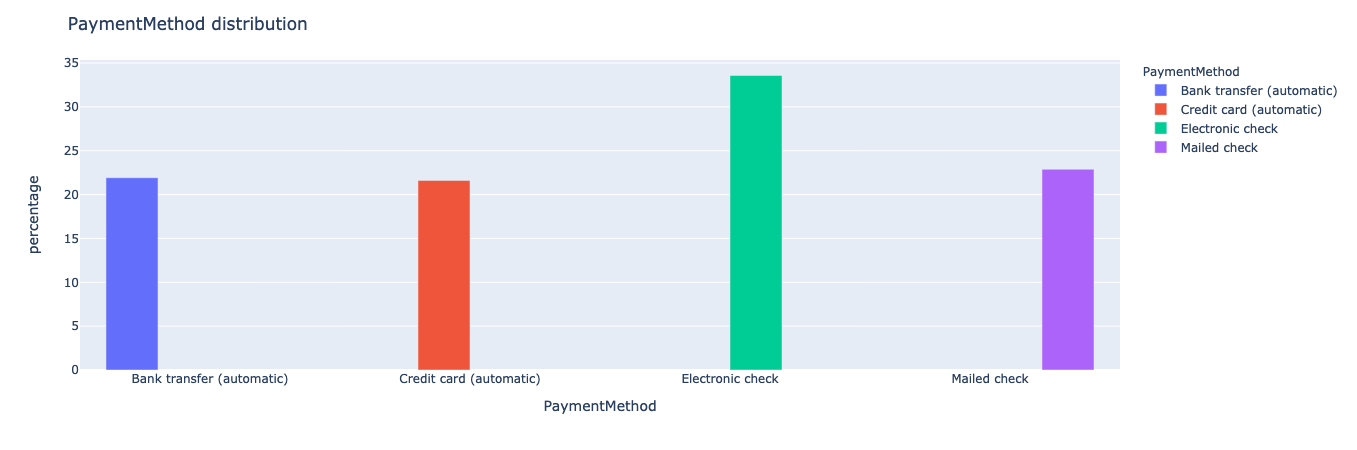

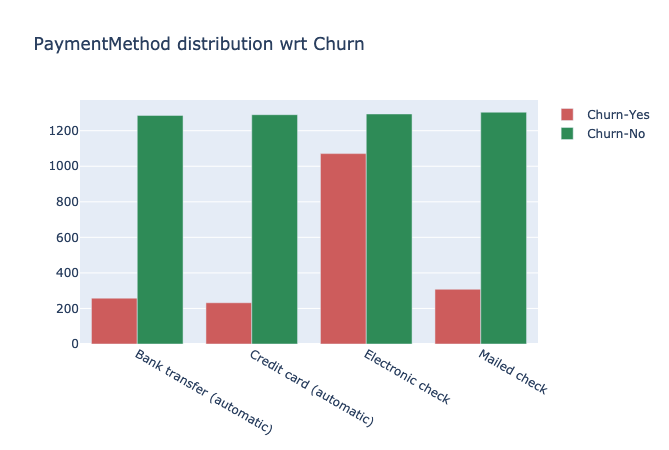

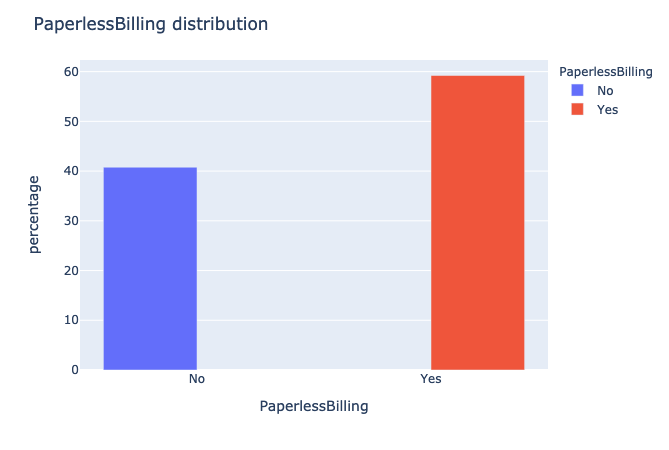

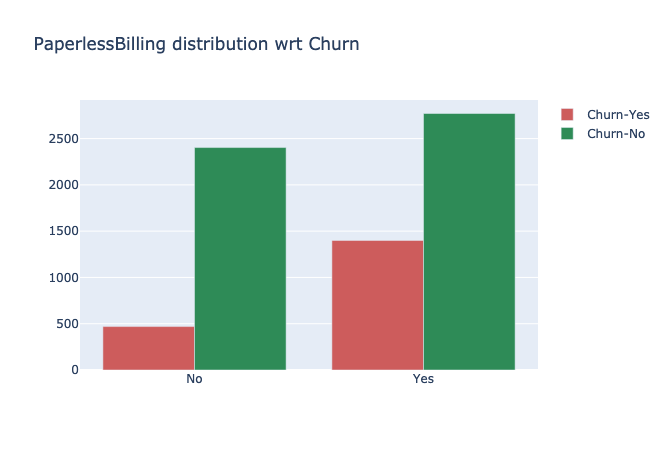

In [32]:
payment_services(data)

People opting for automated payment methods and those that prefer paperless billings  are likely to churn 

### Handling irrelevant/redundant features

It is ideal to remove duplicate features (redundant) and irrelevant features that contain no information that is useful for the data mining task at hand.

Here, the `customerID` doesn't affect the customers' churn rate as it solely use for unique identification purposes only.

In [33]:
# Dropping the customerID feature
data.drop(columns=['customerID'], inplace=True)

### Handling categorical data
Typically, any structured dataset includes multiple columns – a combination of numerical as well as categorical variables. A machine can only understand the numbers. It cannot understand the text. That’s essentially the case with Machine Learning algorithms too.

Categorical features are features which can take on values from a limited set of values. Examples include:

- Levels of heat (Hot, Hotter, Hottest, Android Studio)
- Types of food (Nigerian Jollof, bread, Eba, Beans)


We have two types of categorical data
1. Ordinal categorical data:  Features have natural, ordered category. (One class is higher than another).
2. Non Ordinal categorical data: Features have no order. (No class is higher than the other).


**ORDINAL ENCODING:**

Assign values to each unique category taking into account their order.


**NON-ORDINAL ENCODING:**

A quick logic for remembering which encoding scheme to use

```python

if len(unique classes) is large:

       Use (Label Encoding | Binary Encoding | Hash Encoding
else:
       Use (One Hot Encoding)
Try:
        Target/Mean Encoding 

        Count Encoding
```

1. Label Encoding: Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on order.

2. Binary Encoding: Binary encoding can be thought of as a hybrid of one-hot and hashing encoders. Binary creates fewer features than one-hot, while preserving some uniqueness of values in the column. It can work well with higher dimensionality ordinal data.

3. Hash Encoding: A multivariate hashing implementation with configurable dimensionality/precision.The advantage of this encoder is that it does not maintain a dictionary of observed categories. Consequently, the encoder does not grow in size and accepts new values during data scoring by design.

4. One-Hot Encoding: One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

5. Target/Mean Encoding: For the case of categorical target: features are replaced with a blend of posterior probability of the target given particular categorical value and the prior probability of the target over all the training data. For the case of continuous target: features are replaced with a blend of the expected value of the target given particular categorical value and the expected value of the target over all the training data.


To support Pandas DataFrame out of the box, sklearn has a library (Part of the sklearn.contrib class) called Category_encoders to aid thes various categorical encoding scheme. I will be untilizing pandas get_dummies method

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
cat_cols = data.select_dtypes(include=['object']).columns.to_list()
cat_cols.pop()

'Churn'

In [36]:
for col in cat_cols:
    print(data[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes            

Observe that Name: StreamingMovies is ordinal and the other categorical dataset are nom-ordinal.

**Before encoding these categorical features, seperate the target and feature matrix**

In [37]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [38]:
data.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [39]:
#target 
y = data['Churn']
x = data.drop(columns=['Churn'])

In [40]:
# The contract feature is ordinal
x['Contract'].replace(to_replace='Month-to-month', value=1, inplace=True)
x['Contract'].replace(to_replace='One year',  value=2, inplace=True)
x['Contract'].replace(to_replace='Two year',  value=3, inplace=True)

In [41]:
x['Contract'].values

array([1, 2, 1, ..., 1, 1, 3])

In [42]:
#We need to convert the remaining non-ordinal categorical data using one hot encoding
ml_dummies = pd.get_dummies(x, drop_first=True)
# To avoid dummy trap, we have to drop one dummy column for which unique feature
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

tenure  Contract  MonthlyCharges  TotalCharges  gender_Male  \
0       1         1           29.85         29.85            0   
1      34         2           56.95       1889.50            1   
2       2         1           53.85        108.15            1   
3      45         2           42.30       1840.75            1   
4       2         1           70.70        151.65            0   

   SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0                  0            1               0                 0   
1                  0            0               0                 1   
2                  0            0               0                 1   
3                  0            0               0                 0   
4                  0            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                      

In [43]:
# Alternatively
# import category_encoders as ce
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols)
# ml_dummies = one_hot_enc.fit_transform(x)
# columns_to_drop = ['gender_2','SeniorCitizen_2','Partner_2', 'Dependents_2','PhoneService_2', 'MultipleLines_3', 'InternetService_3',
#                    'OnlineSecurity_3', 'OnlineBackup_3', 'DeviceProtection_3', 'TechSupport_3', 'StreamingMovies_3', 'Contract_3', 
#                     'PaperlessBilling_2', 'PaymentMethod_4'
#                   ]
# ml_dummies.drop(columns=columns_to_drop, inplace=True)

In [44]:
# # Add a random column to the dataframe
# ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [45]:
ml_dummies.shape

(7043, 29)

In [46]:
x = ml_dummies

In [47]:
x.shape

(7043, 29)

In [48]:
cols = x.columns

#### Correlation matrix

Below chart helps in identifying the right features/variables that are correlated for model building

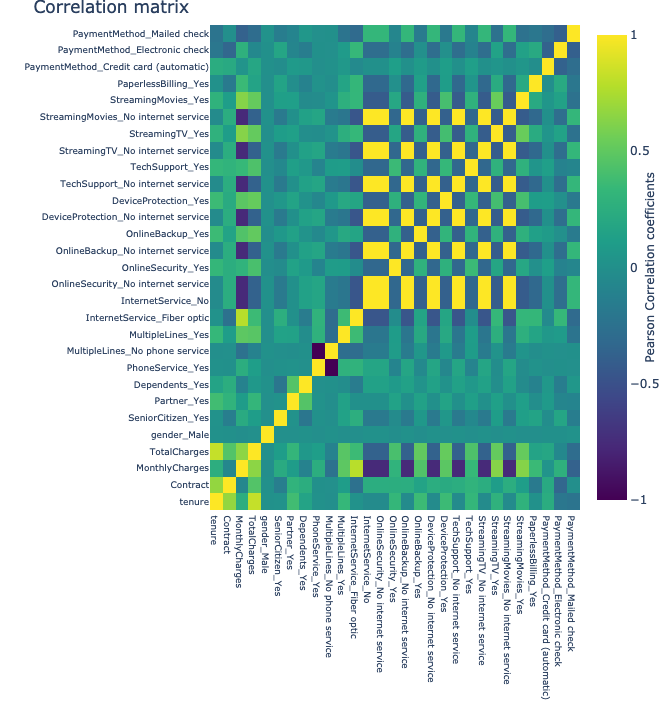

In [49]:
correlation = x.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
trace = [trace]
fig = go.Figure(data=trace, layout=layout)
fig.show()

### Feature Engineering

Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

In [50]:
# # Calculate features
# x['total_charges_to_tenure_ratio'] = x['TotalCharges'] / x['tenure']
# x['monthly_charges_diff'] = x['MonthlyCharges'] - x['total_charges_to_tenure_ratio']
# # x.fillna(x.mean())
# # x = np.nan_to_num(x)

### Feature Scaling

Feature Scaling helps change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

This is very important for distant based models like KNN and also helps speed up trainng in Neural Nets.

Some Normalization functions available in sklearn:

    1. StandardScaler: Standardize features by removing the mean and scaling to unit variance.
    2. RobustScaler: Scale features using statistics that are robust to outliers.
    3. MinMaxScaler: Transforms features by scaling each feature to a given range. Range (Depends on You)

In [51]:
#Use standard scaler
#Note: If you have a train and test set, NEVER FIT STANDARD SCALER TO THE TEST/VAL SET! 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_data = sc.fit_transform(x)

In [52]:
# #Use Robust scaler
# #Note: If you have a train and test set, NEVER FIT ROBUST SCALER TO THE TEST/VAL SET! 

# from sklearn.preprocessing import RobustScaler

# robsc = RobustScaler()
# scaled_data = robsc.fit_transform(x)

In [53]:
# #Use MinMaxScaler scaler

# #Note: If you have a train and test set, NEVER FIT MINMAXSCALER TO THE TEST/VAL SET! 

# from sklearn.preprocessing import MinMaxScaler

# minsc = MinMaxScaler(feature_range=(0,1))
# scaled_data = minsc.fit_transform(x)

In [54]:
scaled_data

array([[-1.27744458, -0.8282069 , -1.16032292, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.06632742,  0.37127103, -0.25962894, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-1.23672422, -0.8282069 , -0.36266036, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-0.87024095, -0.8282069 , -1.1686319 , ..., -0.52504733,
         1.40641839, -0.54480692],
       [-1.15528349, -0.8282069 ,  0.32033821, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 1.36937906,  1.57074896,  1.35896134, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [55]:
scaled_data = pd.DataFrame(data=scaled_data, columns=cols)

In [56]:
scaled_data.head()

tenure  Contract  MonthlyCharges  TotalCharges  gender_Male  \
0 -1.277445 -0.828207       -1.160323     -0.994242    -1.009559   
1  0.066327  0.371271       -0.259629     -0.173244     0.990532   
2 -1.236724 -0.828207       -0.362660     -0.959674     0.990532   
3  0.514251  0.371271       -0.746535     -0.194766     0.990532   
4 -1.236724 -0.828207        0.197365     -0.940470    -1.009559   

   SeniorCitizen_Yes  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          -0.439916     1.034530       -0.654012         -3.054010   
1          -0.439916    -0.966622       -0.654012          0.327438   
2          -0.439916    -0.966622       -0.654012          0.327438   
3          -0.439916    -0.966622       -0.654012         -3.054010   
4          -0.439916    -0.966622       -0.654012          0.327438   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                        3.054010          -0.854176   
1                       -0.327438          -0.854176   
2                       -0.327438          -0.854176   
3                        3.054010          -0.854176   
4                       -0.327438          -0.854176   

   InternetService_Fiber optic  InternetService_No  \
0                    -0.885660           -0.525927   
1                    -0.885660           -0.525927   
2                    -0.885660           -0.525927   
3                    -0.885660           -0.525927   
4                     1.129102           -0.525927   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                           -0.525927           -0.633933   
1                           -0.525927            1.577454   
2                           -0.525927            1.577454   
3                           -0.525927            1.577454   
4                           -0.525927           -0.633933   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                         -0.525927          1.378241   
1                         -0.525927         -0.725563   
2                         -0.525927          1.378241   
3                         -0.525927         -0.725563   
4                         -0.525927         -0.725563   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                             -0.525927             -0.723968   
1                             -0.525927              1.381277   
2                             -0.525927             -0.723968   
3                             -0.525927              1.381277   
4                             -0.525927             -0.723968   

   TechSupport_No internet service  TechSupport_Yes  \
0                        -0.525927        -0.639439   
1                        -0.525927        -0.639439   
2                        -0.525927        -0.639439   
3                        -0.525927         1.563872   
4                        -0.525927        -0.639439   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                        -0.525927        -0.790132   
1                        -0.525927        -0.790132   
2                        -0.525927        -0.790132   
3                        -0.525927        -0.790132   
4                        -0.525927        -0.790132   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                            -0.525927             -0.79607   
1                            -0.525927             -0.79607   
2                            -0.525927             -0.79607   
3                            -0.525927             -0.79607   
4                            -0.525927             -0.79607   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0              0.829798                              -0.525047   
1             -1.205113                              -0.525047   
2              0.829798                              -0.525047   
3             -1.205113                              -0.525047   
4              0.829798            

### Splitting the dataset

In [57]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=42)

In [58]:
X_train.shape, X_test.shape

((4930, 29), (2113, 29))

# Let's take a break

***

***

***

***

<table>
    <th> <img src="../images/break.jpg" style="width: 1000px;"> </th>
    <th><h1>I hope you are enjoying the session?</h1></th>
 </table>

### Model Building

Building machine learning models that have the ability to generalize well on future data requires thoughtful consideration of the data at hand and of assumptions about various available training algorithms. Ultimate evaluation of a machine learning model’s quality requires an appropriate selection and interpretation of assessment criteria.

Once you’ve defined your problem, prepared your data, evaluation criteria and features it’s time to model.

Modelling breaks into three parts,
1. choosing a model,
2. improving a model,
3. comparing it with others.

For the scope of this session, we will develop some predictive models using the following Machine Learning Algorithms:

- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Gaussian Naive Bayes
- KNN Classifier


Then try out some boosting algorithms like:


- Lightgbm
- XGBoost
- AdaBoost
- GradientBoost

Improving the model will be carried out by
- resampling technique,
- hyperparameter tuning and 
- feature selection

Models comparison will be made possible by the following performance metrics:
- Accuracy score: Accuracy is the simple ratio between the number of correctly classified points to the total number of points. Accuracy is simple to calculate but has its own disadvantages.
      Limitations of accuracy

    - If the data set is highly imbalanced, and the model classifies all the data points as the majority class data points, the accuracy will be high. This makes accuracy not a reliable performance metric for imbalanced data.
    - From accuracy, the probability of the predictions of the model can be derived. So from accuracy, we can not measure how good the predictions of the model are. 
***
- roc_auc_score: The area under the ROC curve (ROC AUC) is the single-valued metric used for evaluating the performance. The higher the AUC, the better the performance of the model at distinguishing between the classes. In general, an AUC of 0.5 suggests no discrimination, a value between 0.5–0.7 is acceptable and anything above 0.7 is good-to-go-model. However, medical diagnosis models, usually AUC of 0.95 or more is considered to be good-to-go-model.

When to use ROC?

- ROC curves are widely used to compare and evaluate different classification algorithms.
- ROC curve is widely used when the dataset is imbalanced.


In [64]:
# importing all the algorithms and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score, roc_auc_score

In [65]:
def churn_prediction(algorithm, training_x, testing_x, training_y, testing_y):
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    
    print('Algorithm:', type(algorithm).__name__)
    print("\nAccuracy Score:", accuracy_score(testing_y, predictions))
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("\nArea under curve:", model_roc_auc,"\n")
    

### Baseline model

In [66]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

churn_prediction(decision_tree, X_train, X_test, y_train, y_test)

Algorithm: DecisionTreeClassifier

Accuracy Score: 0.7747278750591576

Area under curve: 0.6787650019357336 



In [67]:
# Random Forest
rfc = RandomForestClassifier()

churn_prediction(rfc, X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

Accuracy Score: 0.7879791765262659

Area under curve: 0.6856770426517966 



In [68]:
# KNN Classifier
knn = KNeighborsClassifier()

churn_prediction(knn, X_train, X_test, y_train, y_test)

Algorithm: KNeighborsClassifier

Accuracy Score: 0.7529578797917653

Area under curve: 0.6741979157469101 



In [72]:
#support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=1.0, kernel='rbf', gamma=0.1, probability=True)   

churn_prediction(svc_rbf, X_train, X_test, y_train, y_test)

Algorithm: SVC

Accuracy Score: 0.7463322290582111

Area under curve: 0.6734728646367499 



In [74]:
#Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear',  gamma=0.1,probability=True)

churn_prediction(svc_lin, X_train, X_test, y_train, y_test)

Algorithm: SVC

Accuracy Score: 0.8088026502602934

Area under curve: 0.7316512826782403 



In [75]:
# Logistic Regression       
logit = LogisticRegression()

churn_prediction(logit, X_train, X_test, y_train, y_test)

Algorithm: LogisticRegression

Accuracy Score: 0.8121154756270705

Area under curve: 0.7377488436538501 



In [76]:
#  LightGBM Classifier
lgbmc = LGBMClassifier()

churn_prediction(lgbmc, X_train, X_test, y_train, y_test)

Algorithm: LGBMClassifier

Accuracy Score: 0.7950780880265026

Area under curve: 0.711851897132171 



In [77]:
# XGBoost Classifier
xgc = XGBClassifier()

churn_prediction(xgc,  X_train, X_test, y_train, y_test)

Algorithm: XGBClassifier

Accuracy Score: 0.7917652626597255

Area under curve: 0.705208142306987 



In [78]:
# Adaboost
adac = AdaBoostClassifier()

churn_prediction(adac,  X_train, X_test, y_train, y_test)

Algorithm: AdaBoostClassifier

Accuracy Score: 0.8035967818267865

Area under curve: 0.7204308195964164 



In [79]:
#GradientBoost
gbc = GradientBoostingClassifier()

churn_prediction(gbc,  X_train, X_test, y_train, y_test)

Algorithm: GradientBoostingClassifier

Accuracy Score: 0.8064363464268812

Area under curve: 0.7218339434856336 



In [86]:
#putting all the model names, model classes and the used columns in a dictionary
models = {'Decision Tree(Baseline)': [decision_tree],
          'Random Forest': [rfc],
          'KNN Classifier': [knn], 
          'SVM (rbf)': [svc_rbf], 
          'SVM (linear)': [svc_lin], 
          'Logistic': [logit],
          'LGBM Classifier': [lgbmc],
          'XGBoost Classifier': [xgc], 
          'AdaBoost': [adac], 
          'GradientBoost': [gbc], 
         }

In [87]:
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
   
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Roc_auc"         : [roc_auc]
                      })
    return df

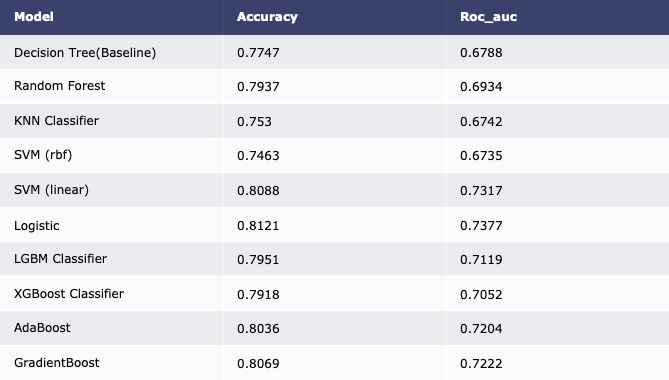

In [88]:
#outputs for all models over the training dataset
model_performances_train = pd.DataFrame() 

for name in models:
     model_performances_train = model_performances_train.append(model_report(models[name][0],X_train, 
                                                                                X_test, 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

It can observed that the Naive Bayes had the highest ROC_AUC score, let's see if we can improve on that.

**Let's try to tune our hyperparameters**

In [92]:
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import RandomizedSearchCV


lgt_bst = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 100),
}


model = RandomizedSearchCV(lgt_bst, param_grid, n_iter=500, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)
search = model.fit(x, y)
search.best_params_

{'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'}

In [96]:
best_model = LogisticRegression(random_state=1, C=0.008301451461243866, penalty='none', solver='newton-cg' )

In [97]:
#  LightGBM Classifier
lgbmc = LGBMClassifier()

churn_prediction(best_model, X_train, X_test, y_train, y_test)

Algorithm: LogisticRegression

Accuracy Score: 0.8116422148603881

Area under curve: 0.7368777635144773 



Here brings the concepts of underfitting and overfitting...

***

# What Next?

***